In [90]:
%load_ext autoreload
%autoreload 2

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

sns.set_style('whitegrid')

sys.path.append("../")
from utility.ar1 import AR1
from utility.hmm1 import HMM1
from utility.ar import AR
from utility.hmmar1 import HMMAR1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Simulated Data

In [91]:
# grouth truth
phi = 0.99
s = 1
v = s * (1 - phi**2)
w = s
hmm_sim = HMM1(phi, v, w_var=w)

# simulated series
np.random.seed(23502938)
df = hmm_sim.simulate(0, 1000)

# Fits a HMMRAR(1) model with known parameters
x0 = HMMAR1.LatentState(0, s)
para = HMMAR1.Parameter(phi, v, w)

hmm_model = HMMAR1(x0)

for y in df['ys']:
    hmm_model.filter(y, para)

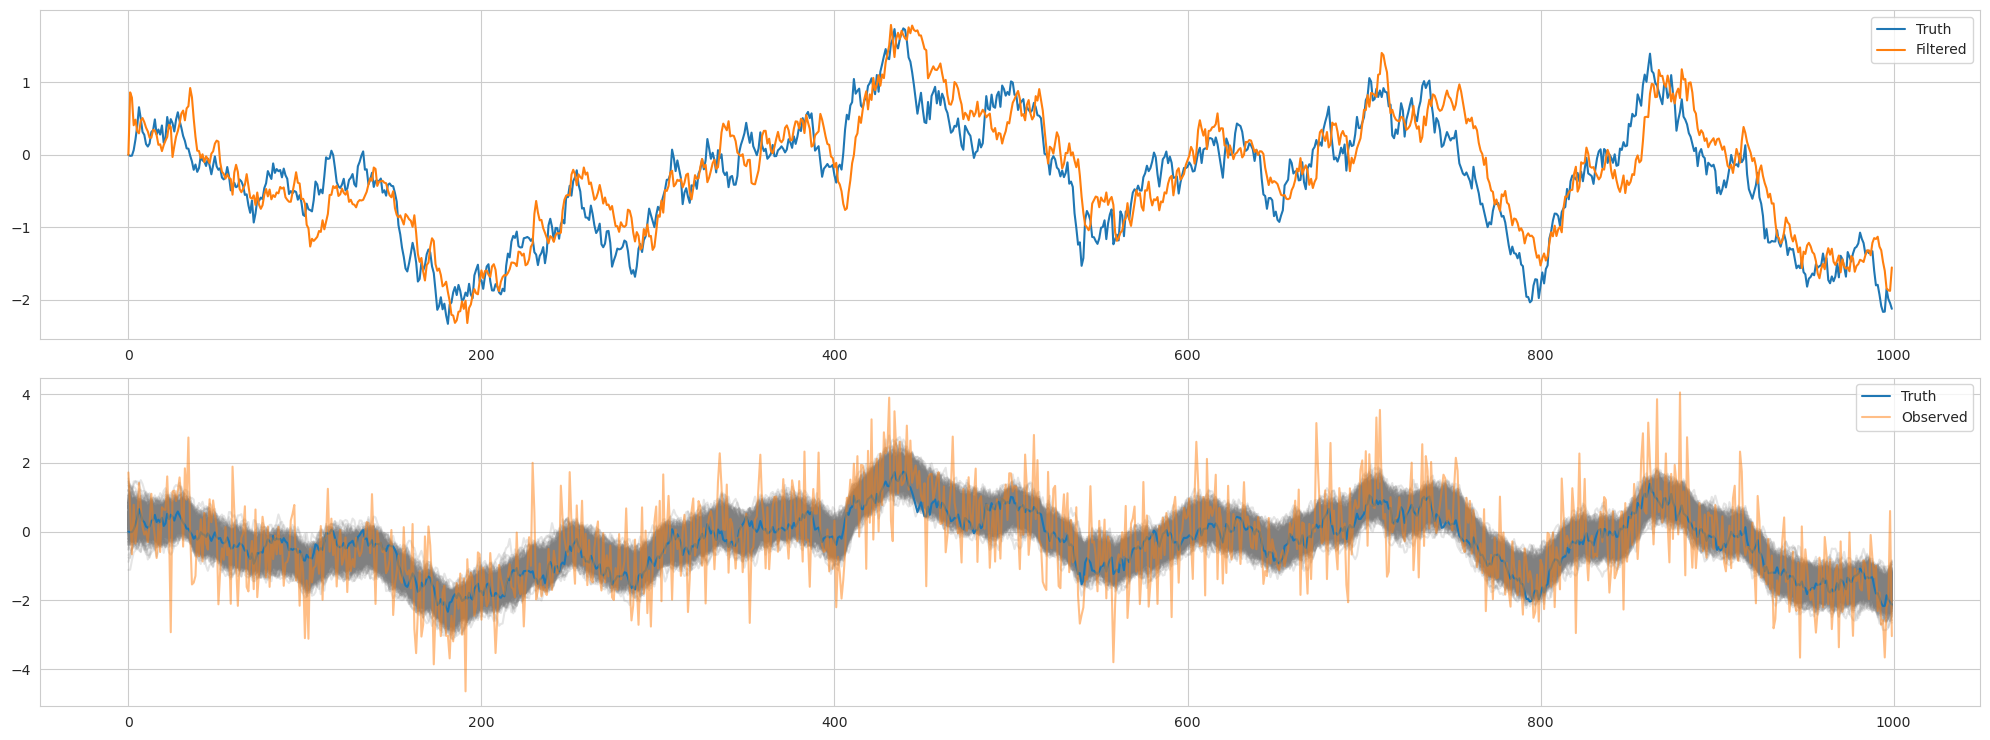

In [97]:
fig, ax = plt.subplots(nrows=2, figsize=(20, 7.5))

df['xs'].plot(label='Truth', ax=ax[0])
pd.DataFrame(hmm_model.states)['mean'].iloc[:-1].plot(ax=ax[0], label='Filtered')
ax[0].legend(loc='best')

# FFBS procedure
traces = hmm_model.sample_trace(500, para)
ax[1].plot(traces, alpha=0.2, color='grey')

df['xs'].plot(label='Truth', ax=ax[1])
df['ys'].plot(label='Observed', alpha=0.5, ax=ax[1])
ax[1].legend()

fig.tight_layout()
fig.show()

### SOI Data

In [98]:
soi = pd.read_table("../data/soi.txt", names=['soi']).soi

<AxesSubplot: >

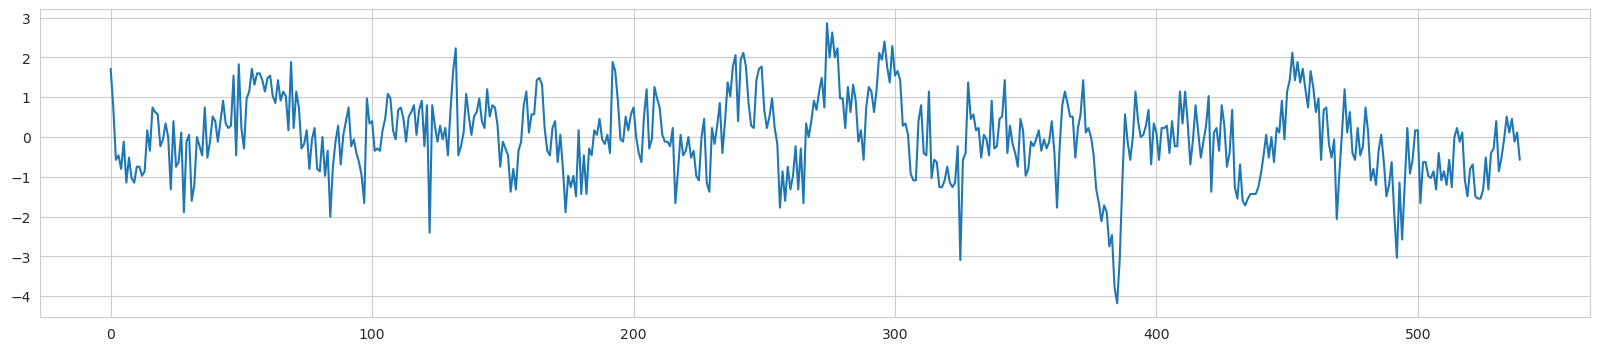

In [99]:
soi.plot(figsize=(20, 4))

In [101]:
# estimated from the data
phi = 0.64
s = 0.2
v = s * (1 - phi**2)
w = 1

x0 = HMMAR1.LatentState(0, s)
para = HMMAR1.Parameter(phi, v, w)

hmm_model = HMMAR1(x0)

for y in soi:
    hmm_model.filter(y, para)

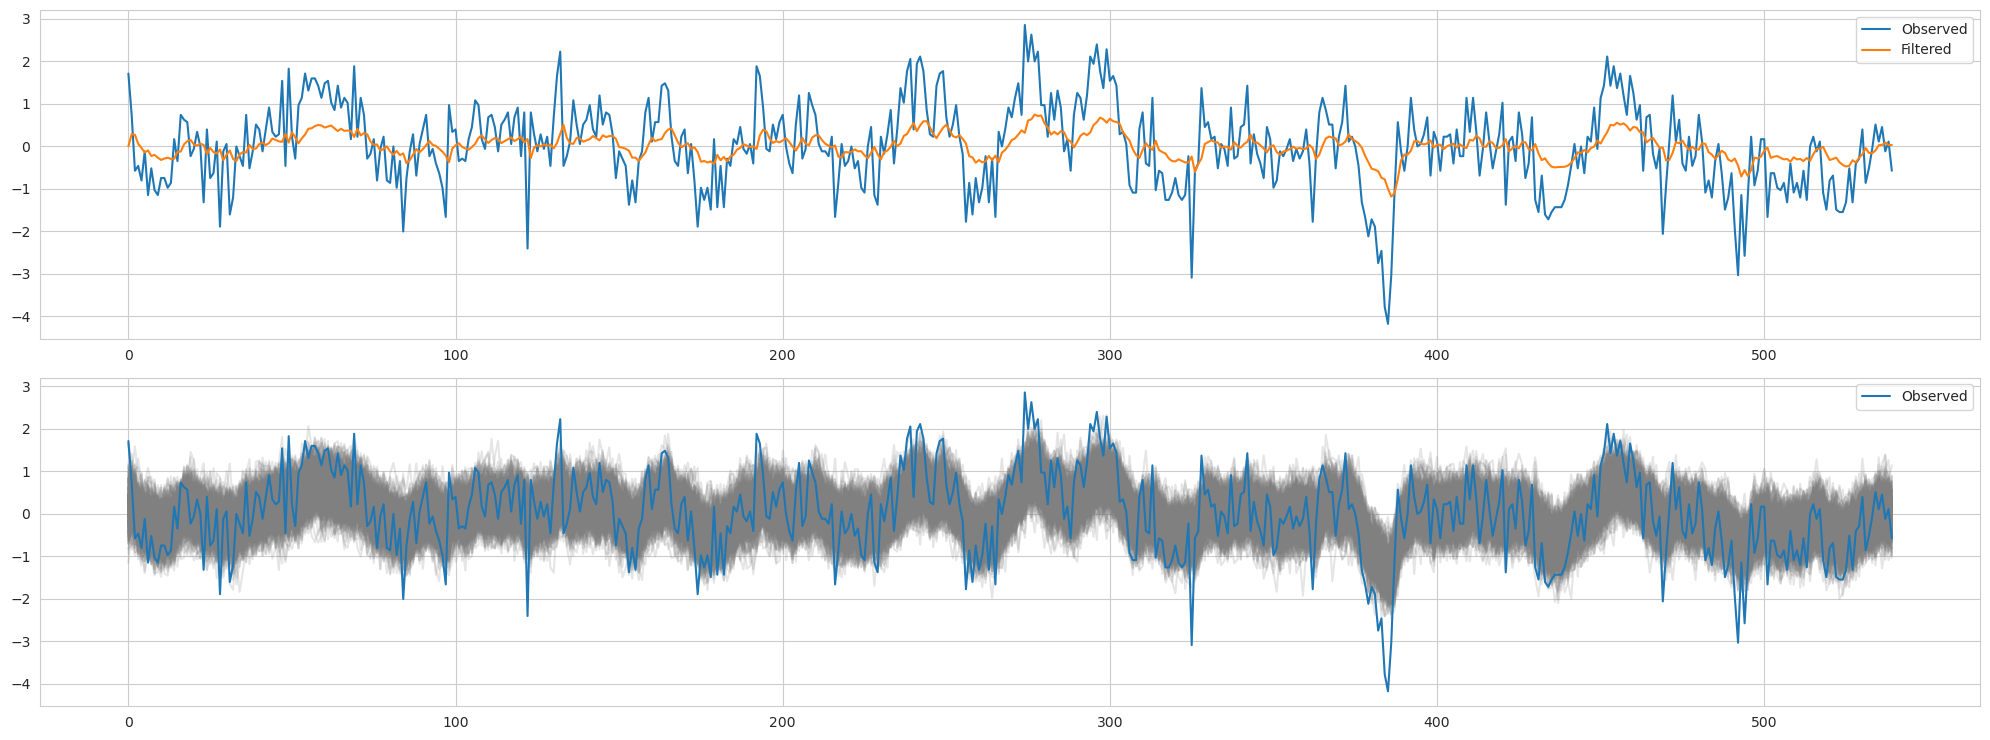

In [102]:
fig, ax = plt.subplots(nrows=2, figsize=(20, 7.5))

soi.plot(label='Observed', ax=ax[0])
pd.DataFrame(hmm_model.states)['mean'].iloc[:-1].plot(ax=ax[0], label='Filtered')
ax[0].legend(loc='best')

# FFBS procedure
traces = hmm_model.sample_trace(500, para)
ax[1].plot(traces, alpha=0.2, color='grey')

soi.plot(label='Observed', ax=ax[1])
ax[1].legend()

fig.tight_layout()
fig.show()